### Inferential and descriptive statistics

In [1]:
# inferential statistics -> do the test on 100 and say overall percentage
# descriptive statistics -> do the test for all and say overall percentage

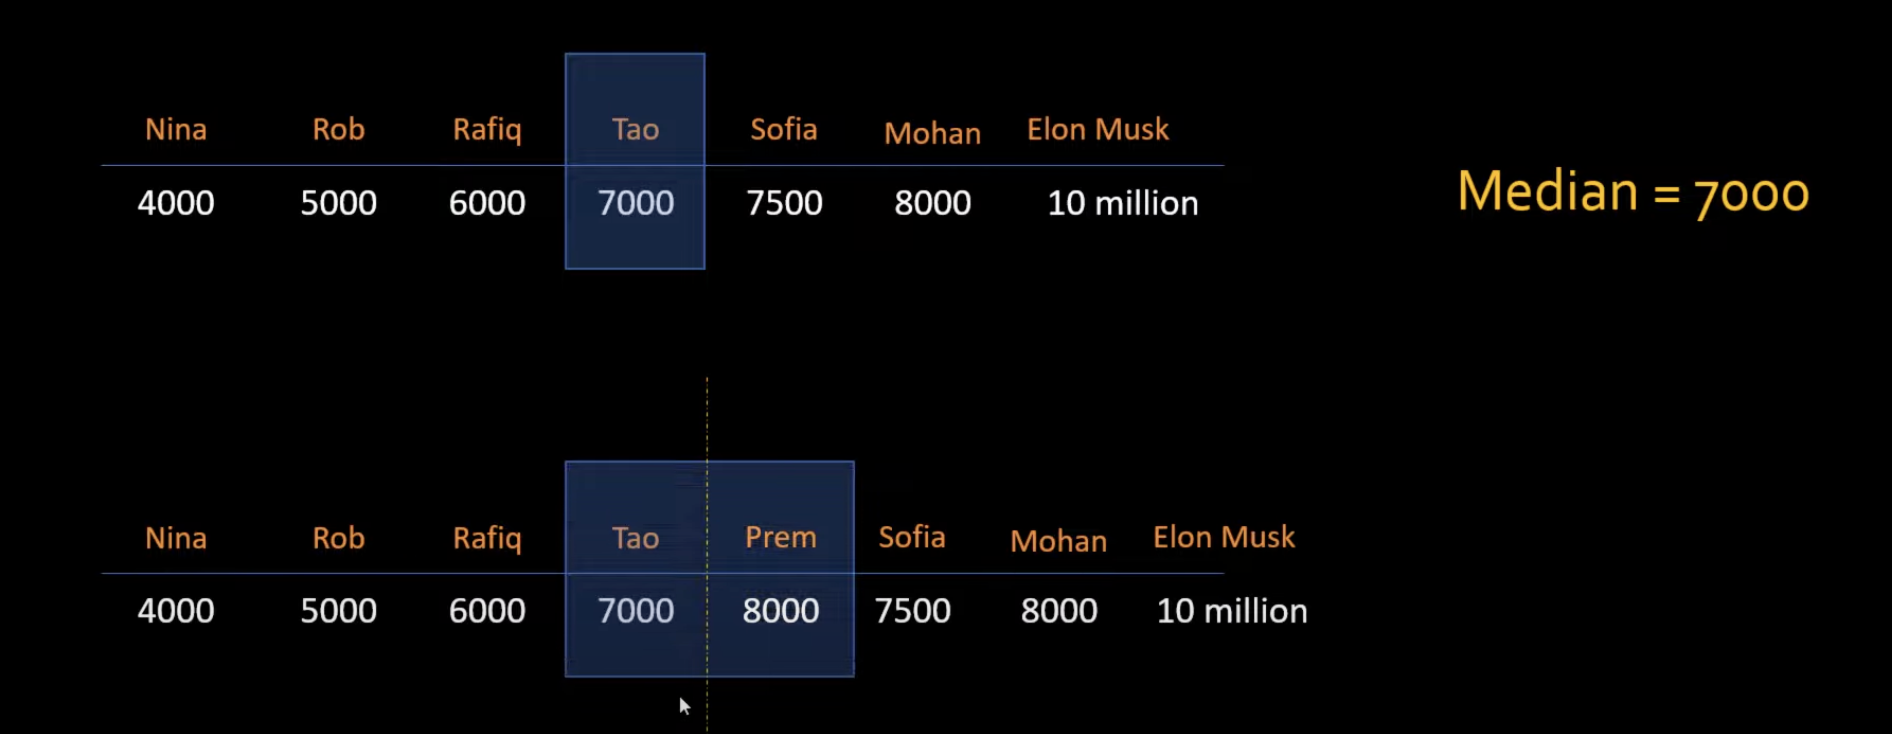

In [2]:
# Average is not giving perfect if we have some unusual number
# median might give good look

#### Handling missing values

In [3]:
# as in previous it isnot good idea to have average better median
# so in here mush is outlier data point

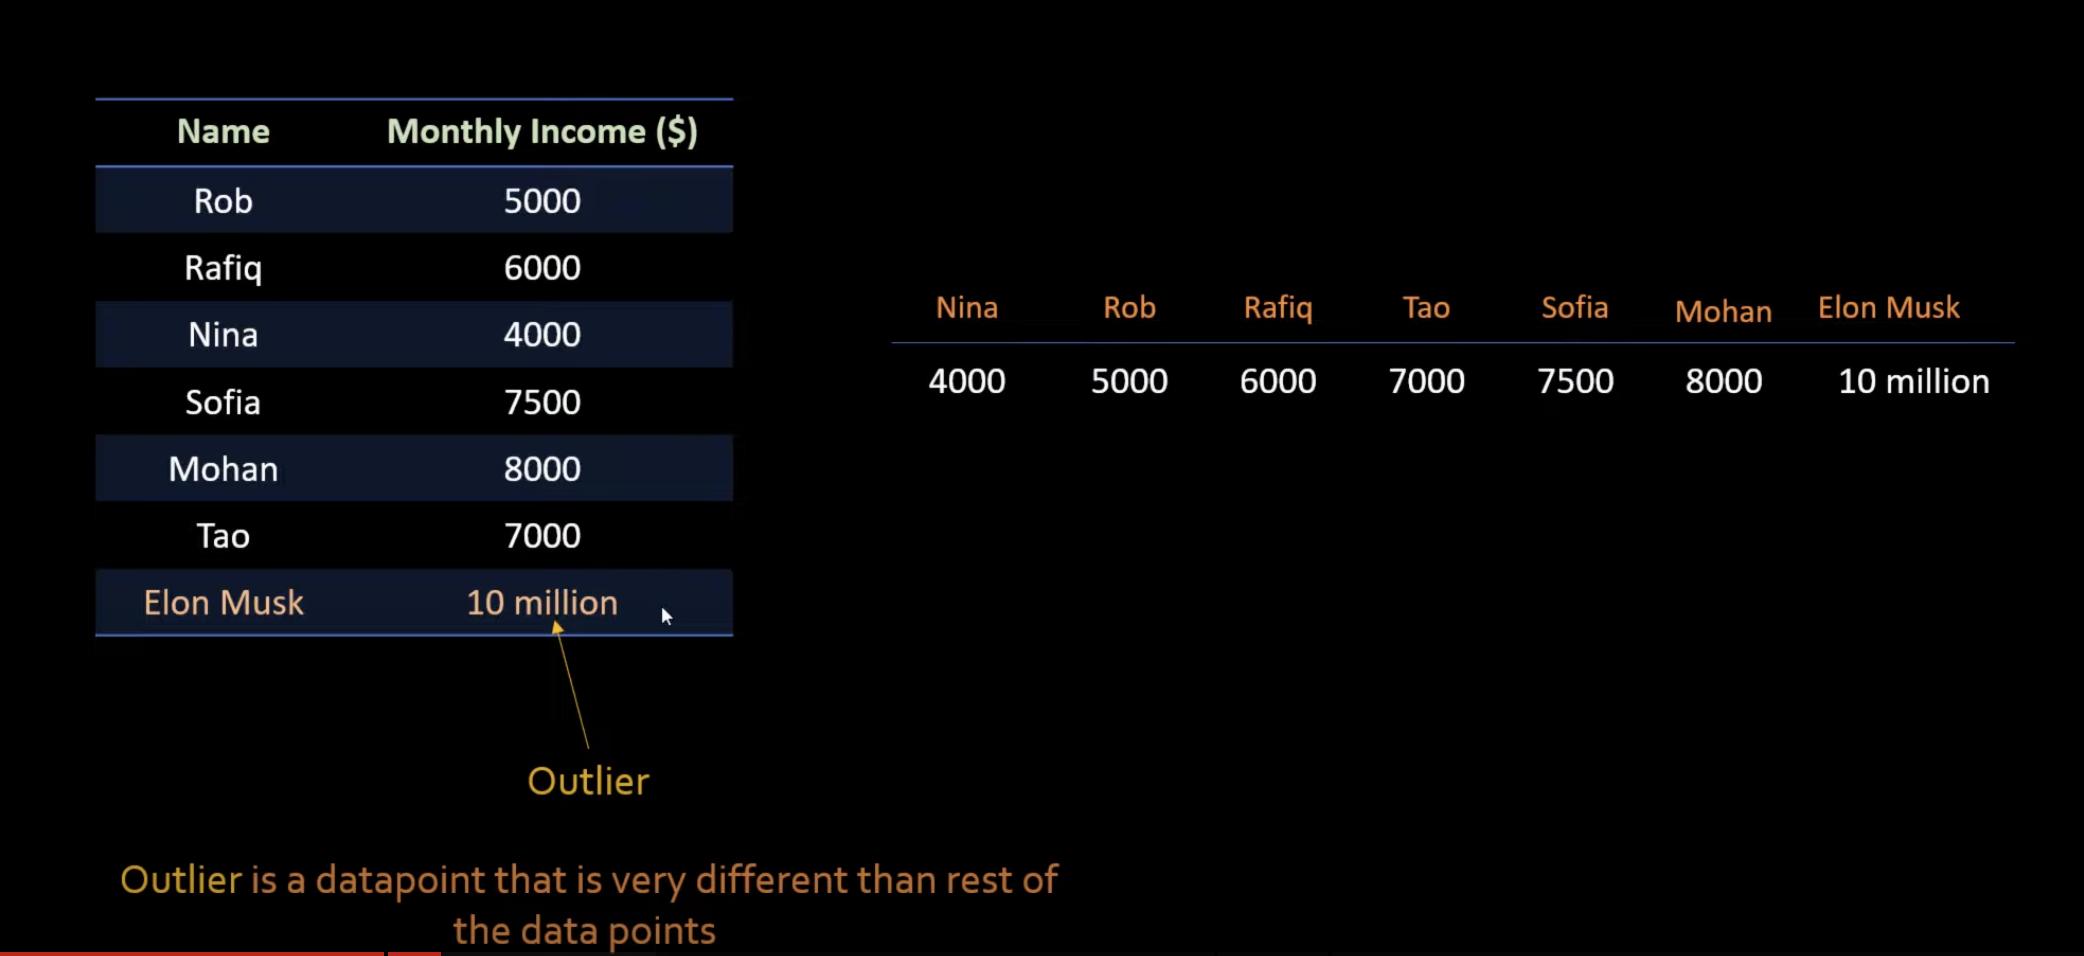

In [4]:
# outliers are the value that greater then 99% percentile -> above elon

In [5]:
# mode is maximum amount of values (max occurances)

In [6]:
import pandas as pd
df = pd.read_csv('data/income.csv')
df

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel      4.7
4      Axis Bank      5.6
5        Vedanta     11.3

In [7]:
df.describe()

revenue
count    6.000000
mean    74.933333
std    152.688646
min      4.700000
25%      6.950000
50%     11.150000
75%     26.075000
max    386.000000

In [8]:
df_no_outlier = df[df.revenue<df.revenue.quantile(0.99)]
df_no_outlier

company  revenue
0         Tesla      31.0
1           UBER     11.0
3  Jindal  Steel      4.7
4      Axis Bank      5.6
5        Vedanta     11.3

In [9]:
import numpy as np
df['revenue'][3]= np.NaN

/var/folders/bt/yzv722jd4ln6fj7873tf5mn00000gn/T/ipykernel_5917/3742551979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'][3]= np.NaN


In [10]:
df

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel      NaN
4      Axis Bank      5.6
5        Vedanta     11.3

In [11]:
df_new = df.fillna(df.revenue.median())
df_new

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel     11.3
4      Axis Bank      5.6
5        Vedanta     11.3

 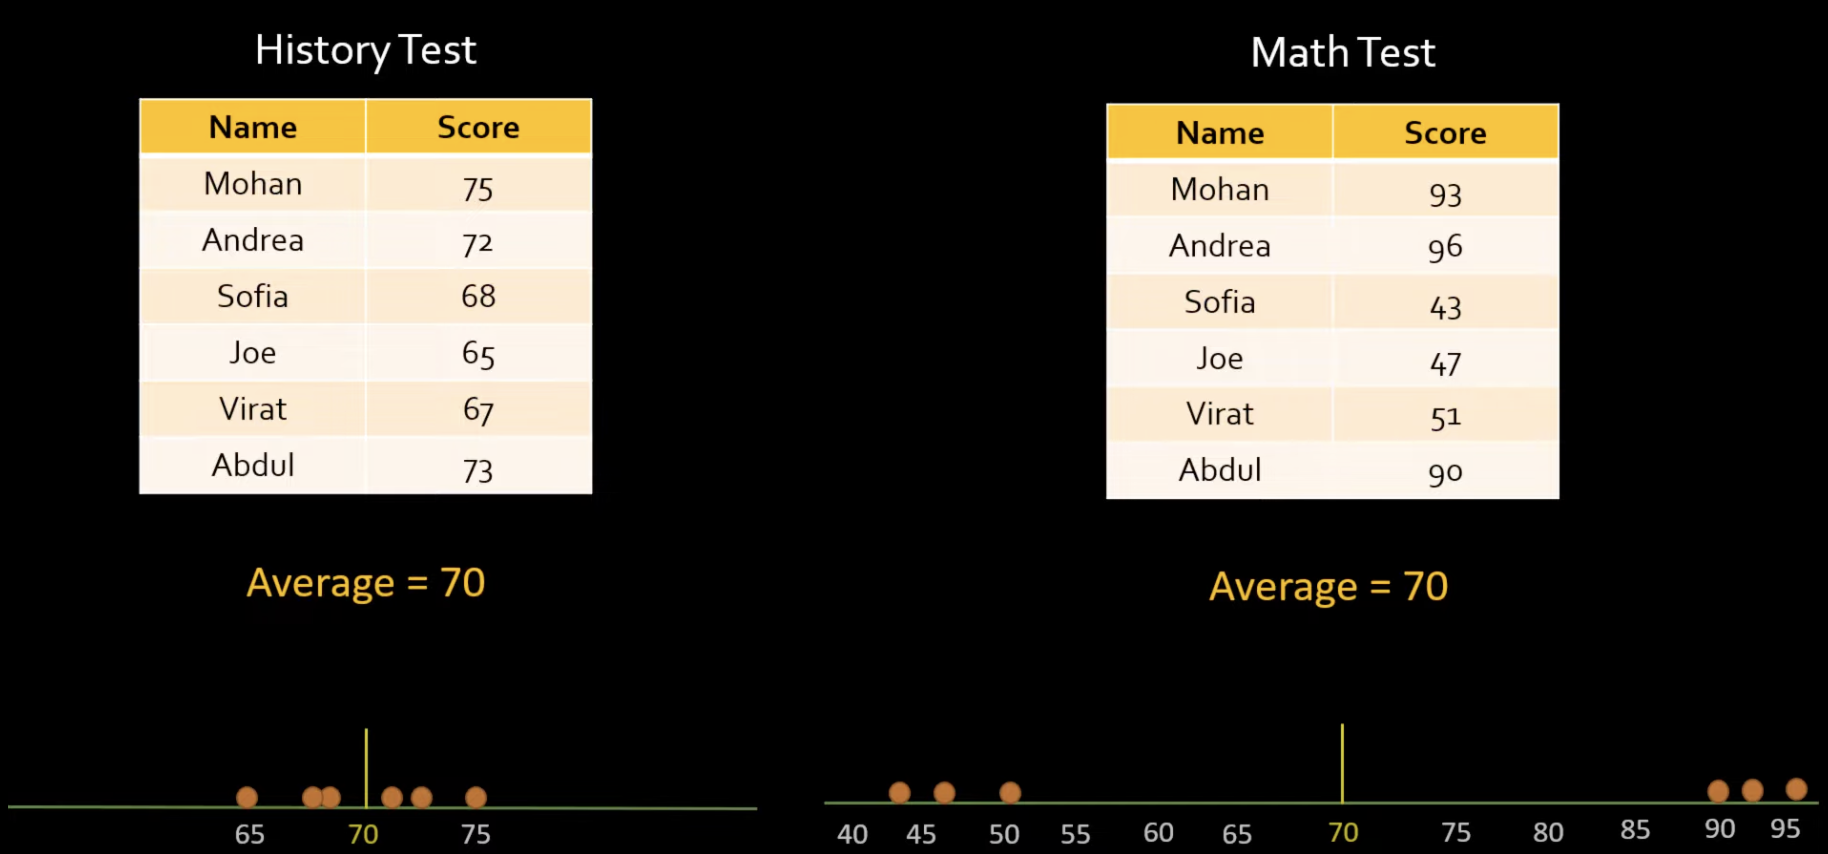

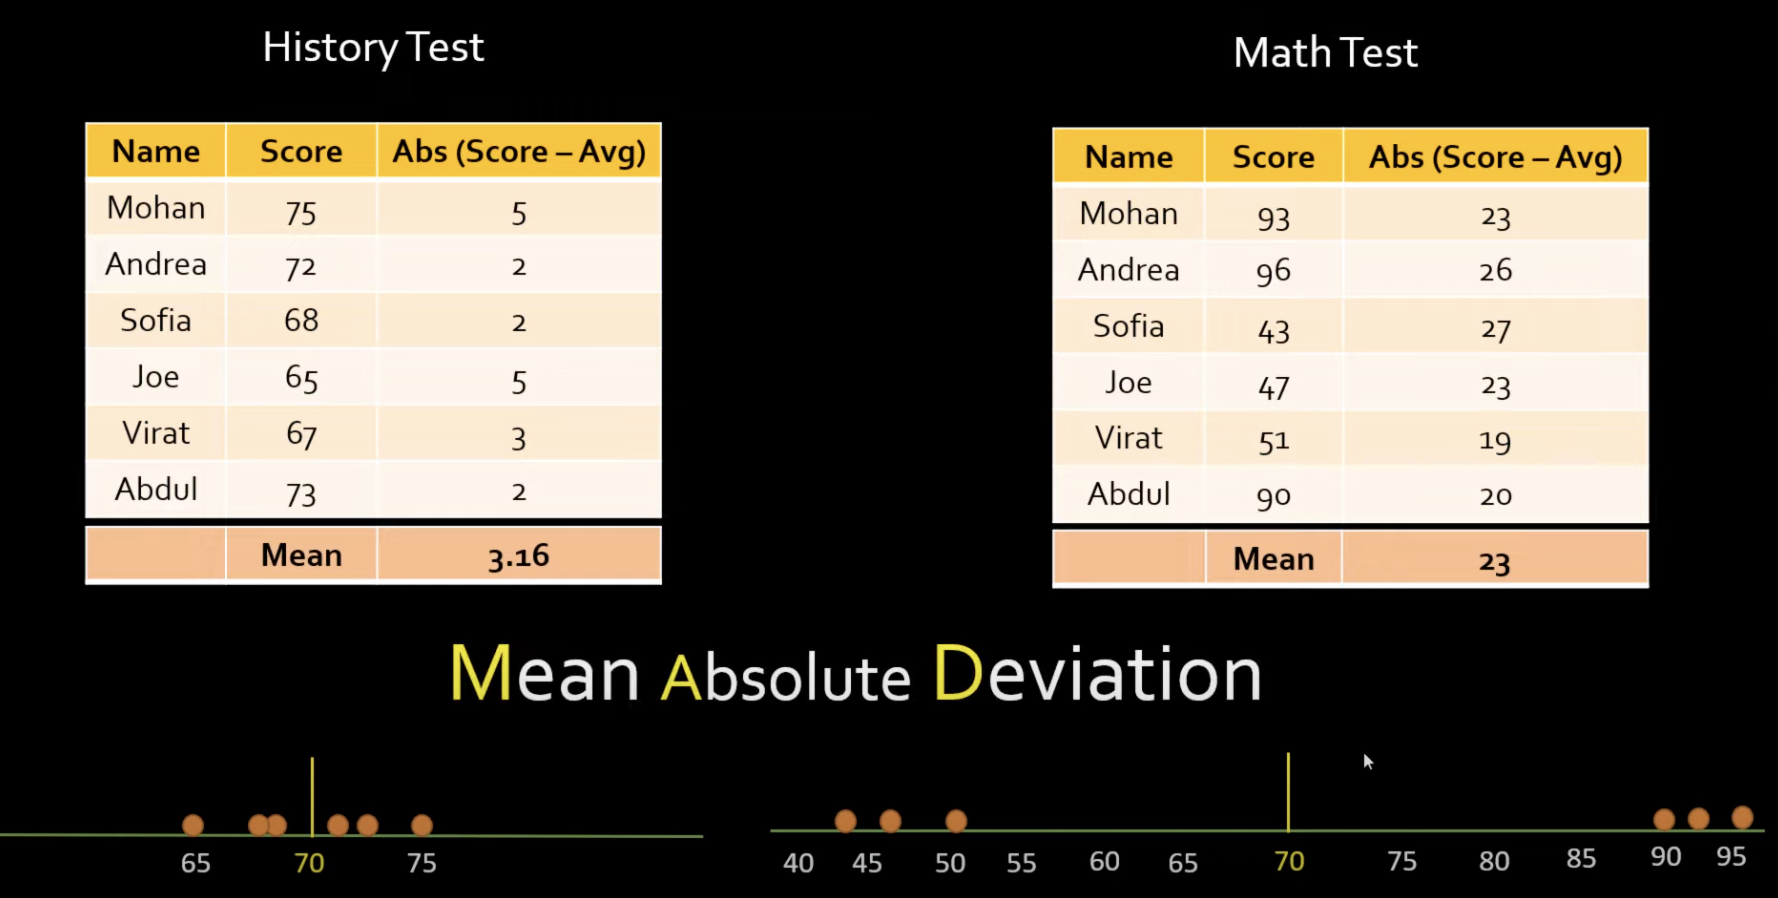

In [12]:
# in here we can see data is distributed from mean

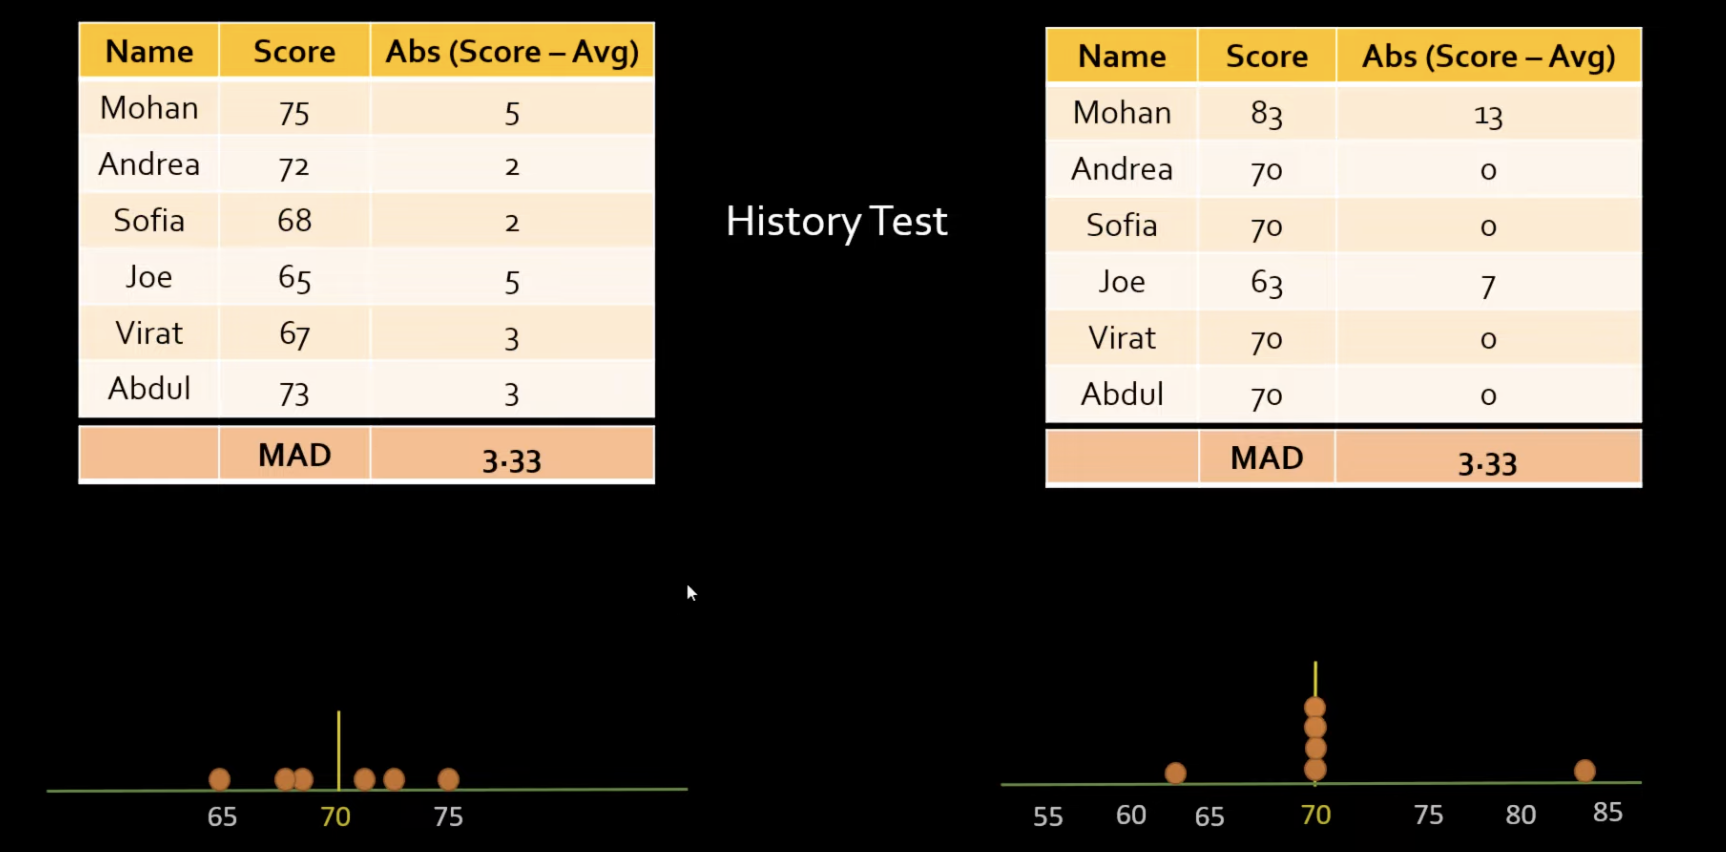

In [13]:
# in here you can see in second one we have far away data so mad is not useful here

 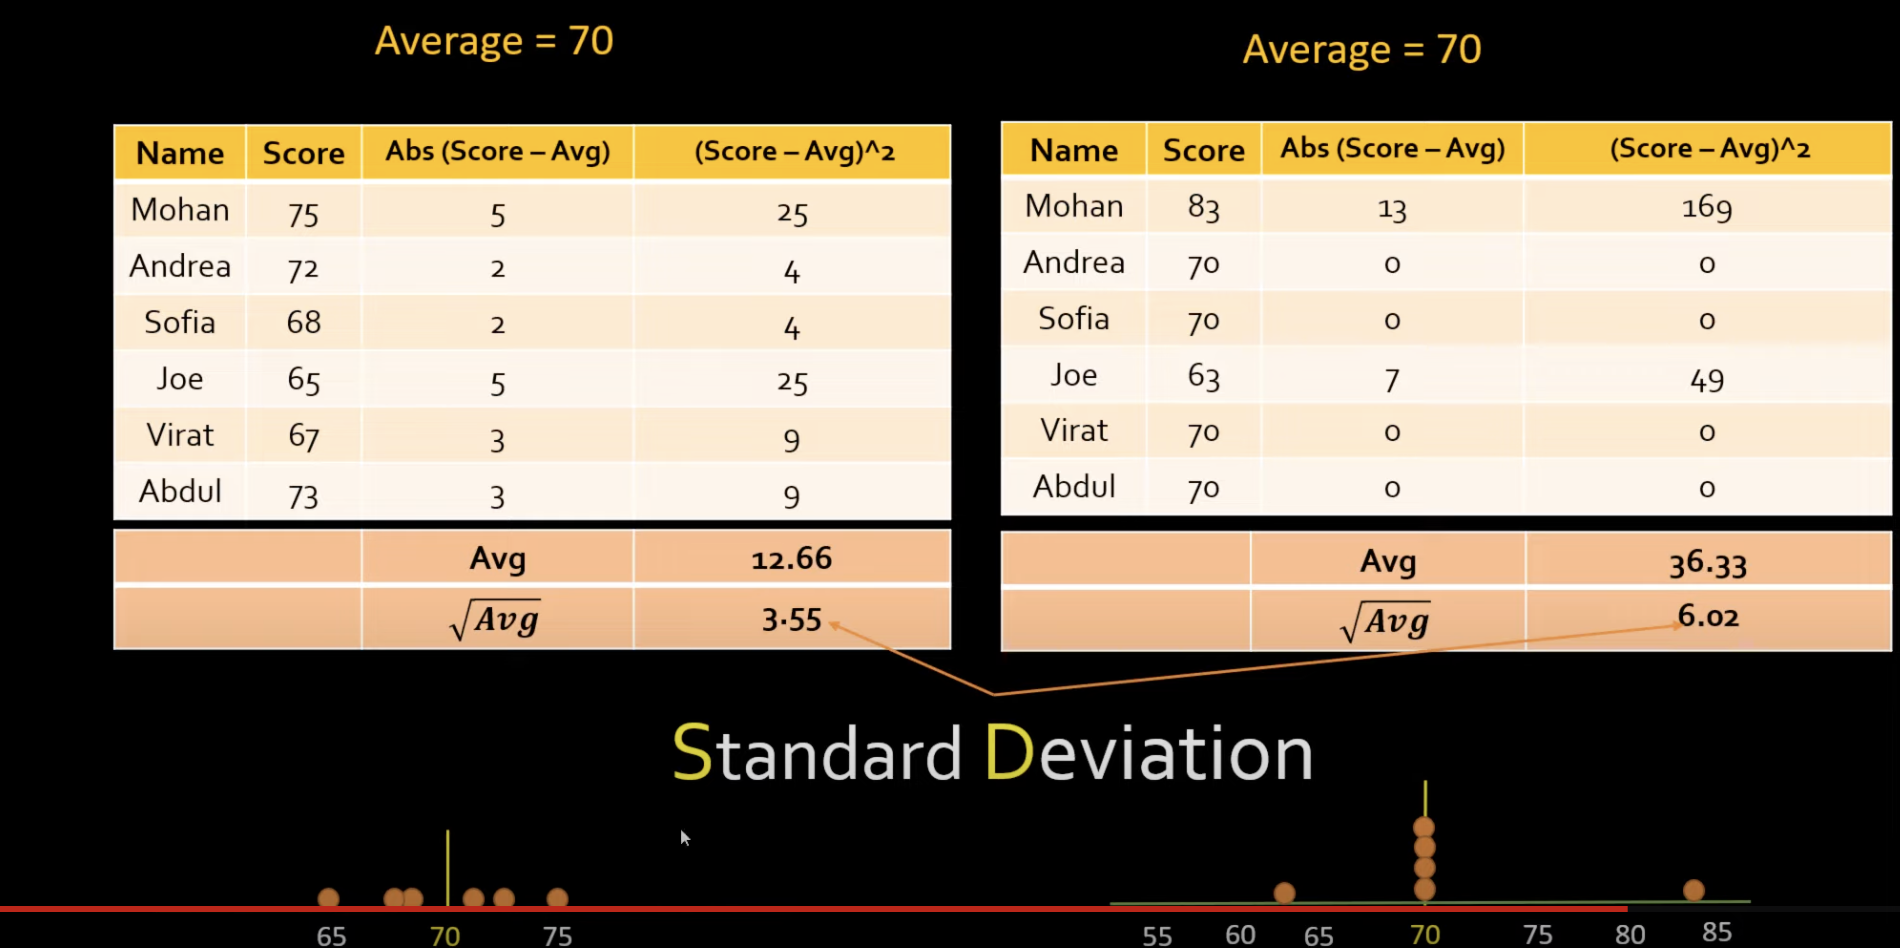

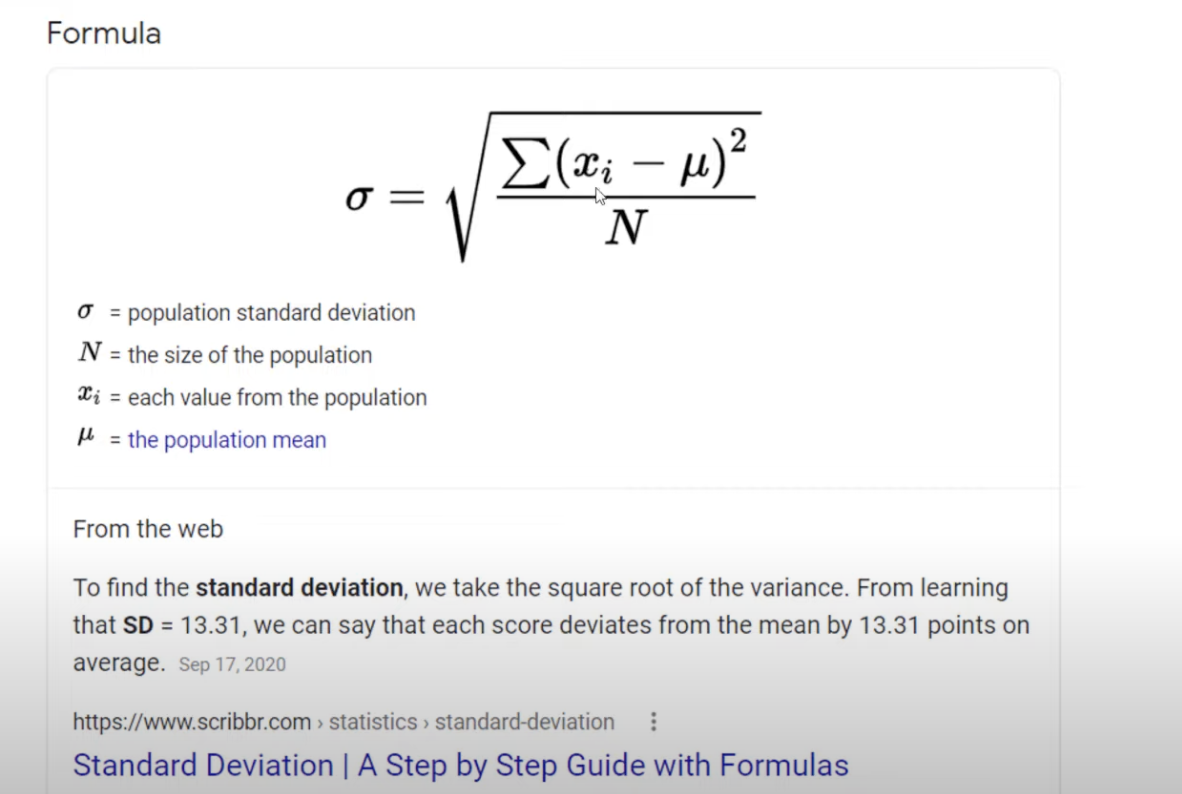

#### Normal distribution is used in data cleaning and outlier removal

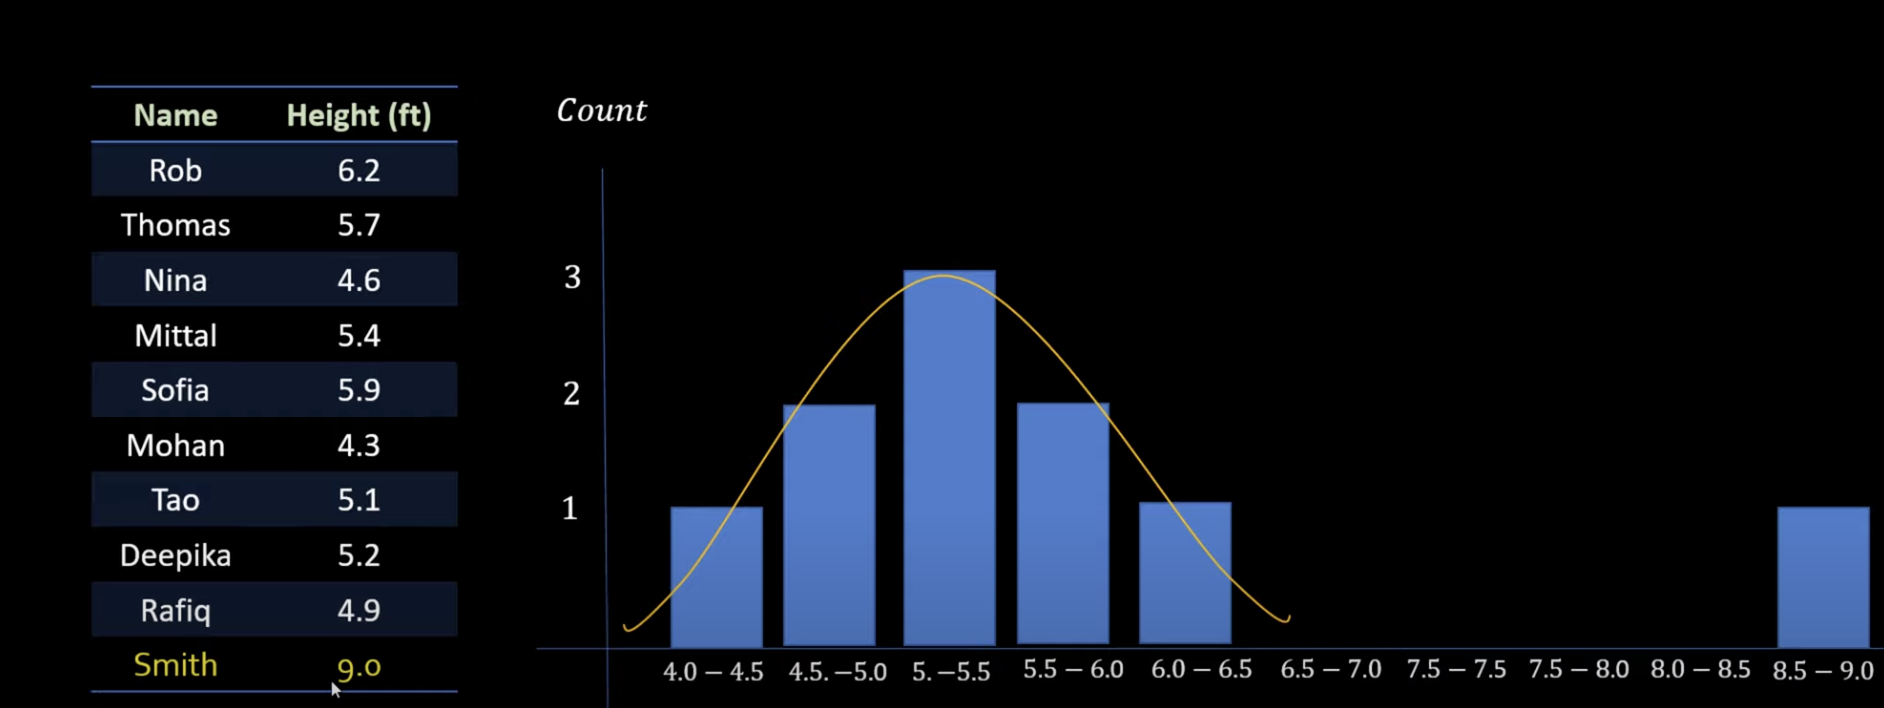

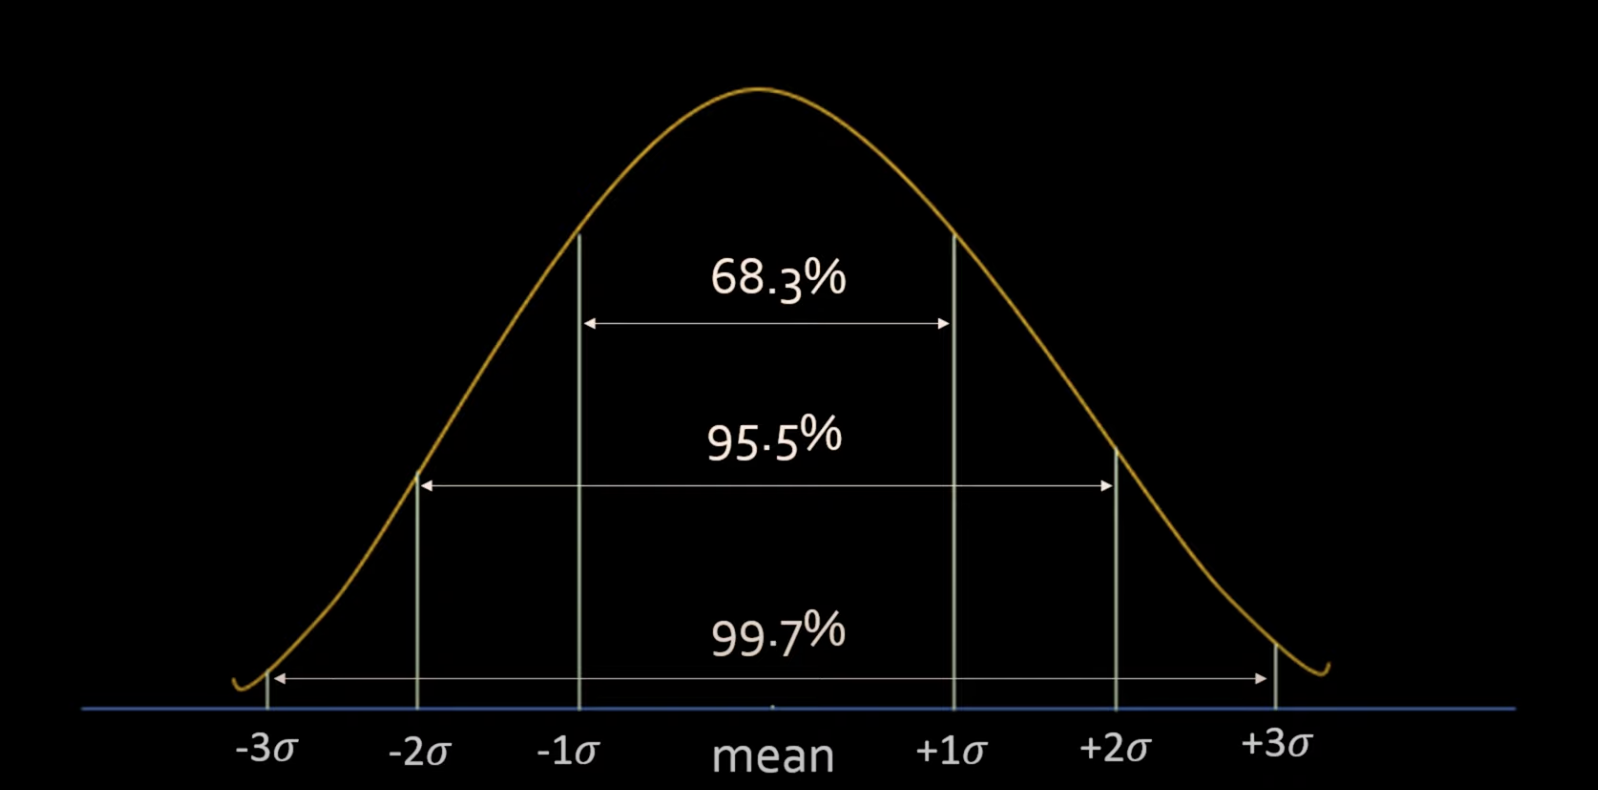

### How to use Standard deviation to remove outliers

In [14]:
import pandas as pd
df = pd.read_csv('data/heights.csv')
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [15]:
df.describe()

height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='height', ylabel='Count'>

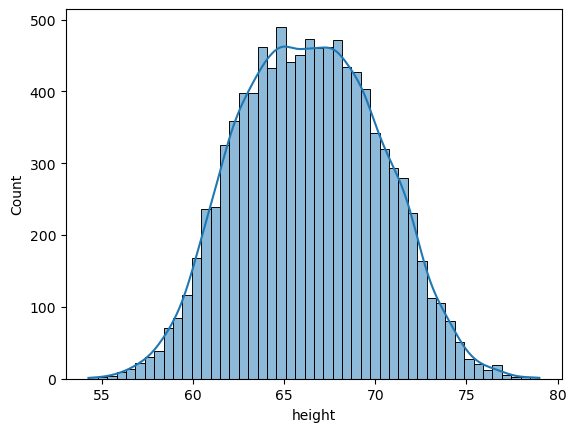

In [17]:
sns.histplot(df.height, kde=True)

In [18]:
mean = df.height.mean()
std_deviation = df.height.std()

In [19]:
min_outlier = mean - 3*std_deviation
max_outlier = mean + 3*std_deviation
print(min_outlier)
print(max_outlier)


54.824975392478876
77.91014411725232


In [20]:
df_no_outlier = df[(df.height>min_outlier)&(df.height<max_outlier)]
df_no_outlier

gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9993 rows x 2 columns]

In [21]:
df[(df.height<min_outlier)|(df.height>max_outlier)]

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

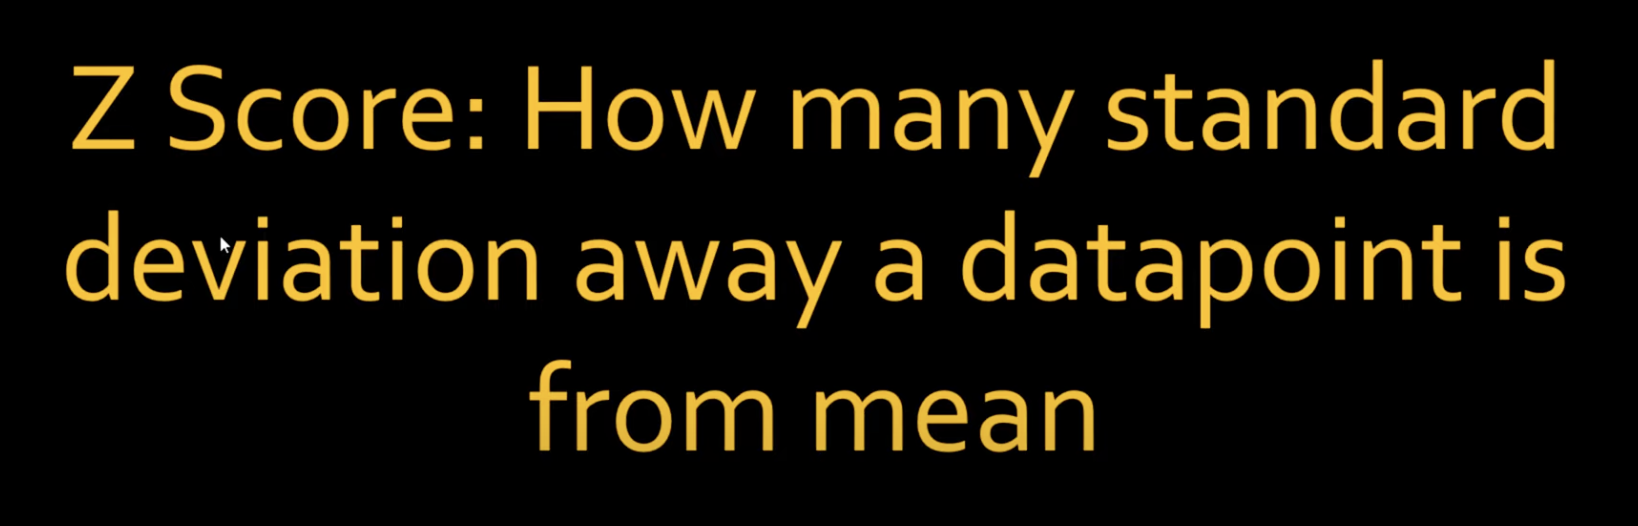

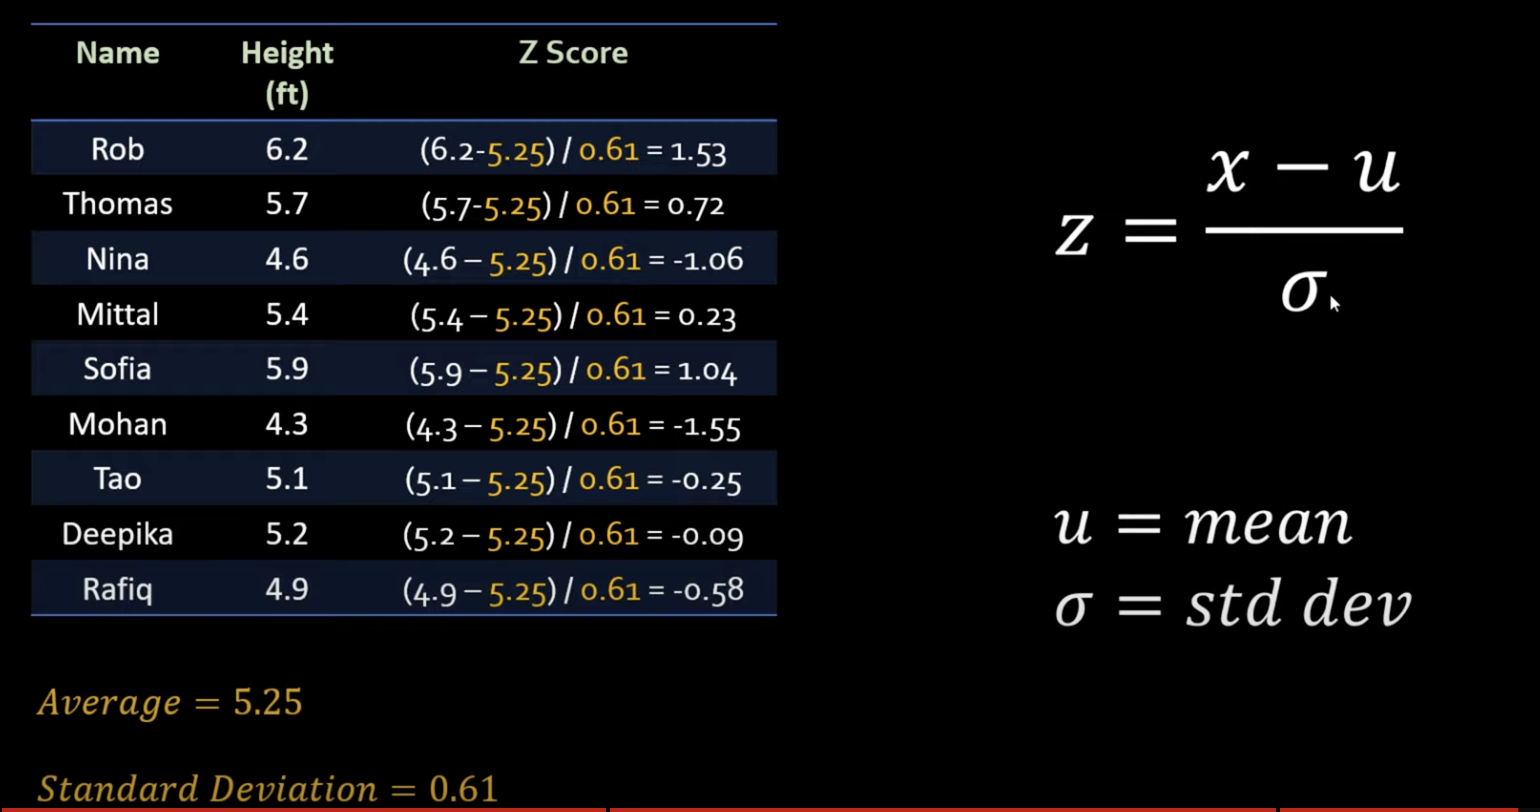

In [22]:
df['Z-Score'] = (df.height-df.height.mean())/df.height.std()
df.head()

gender     height   Z-Score
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375

#### Logarithm

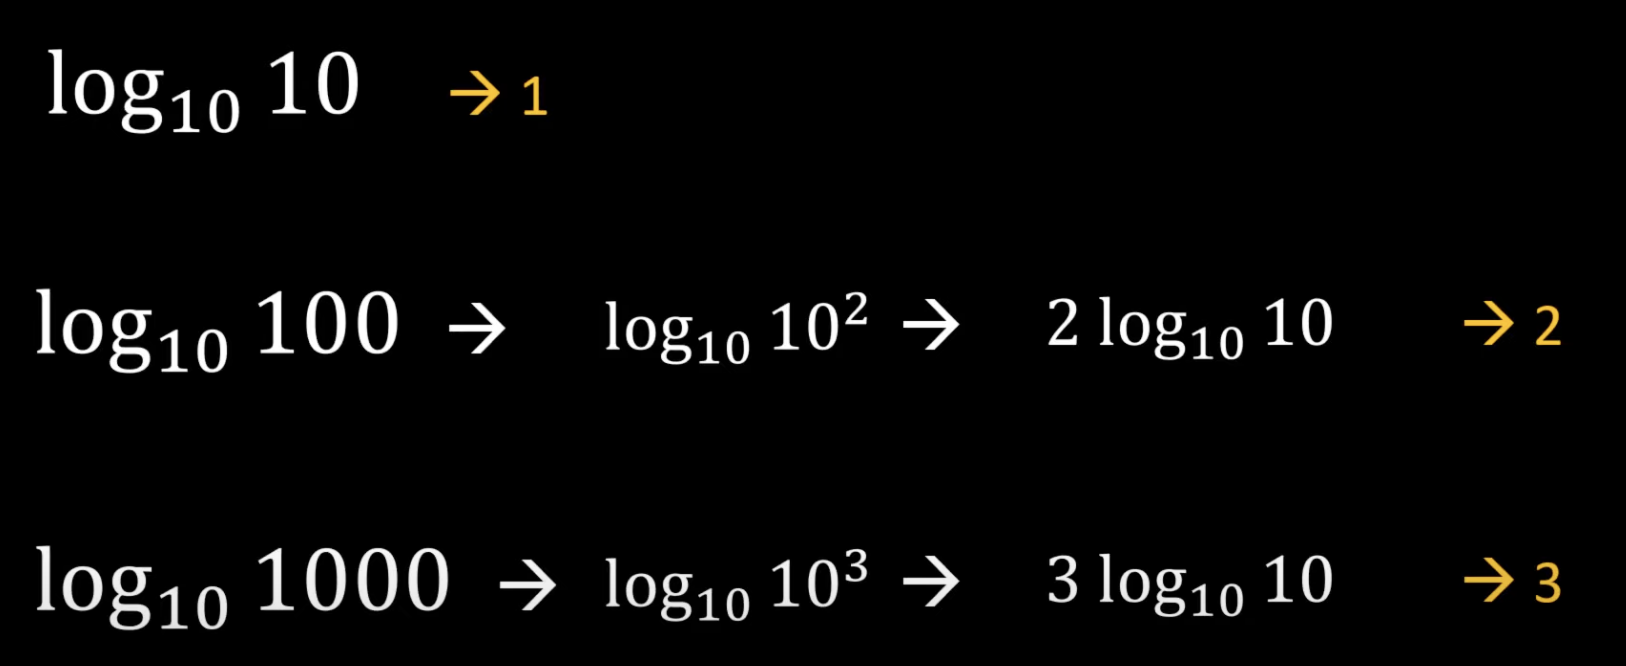

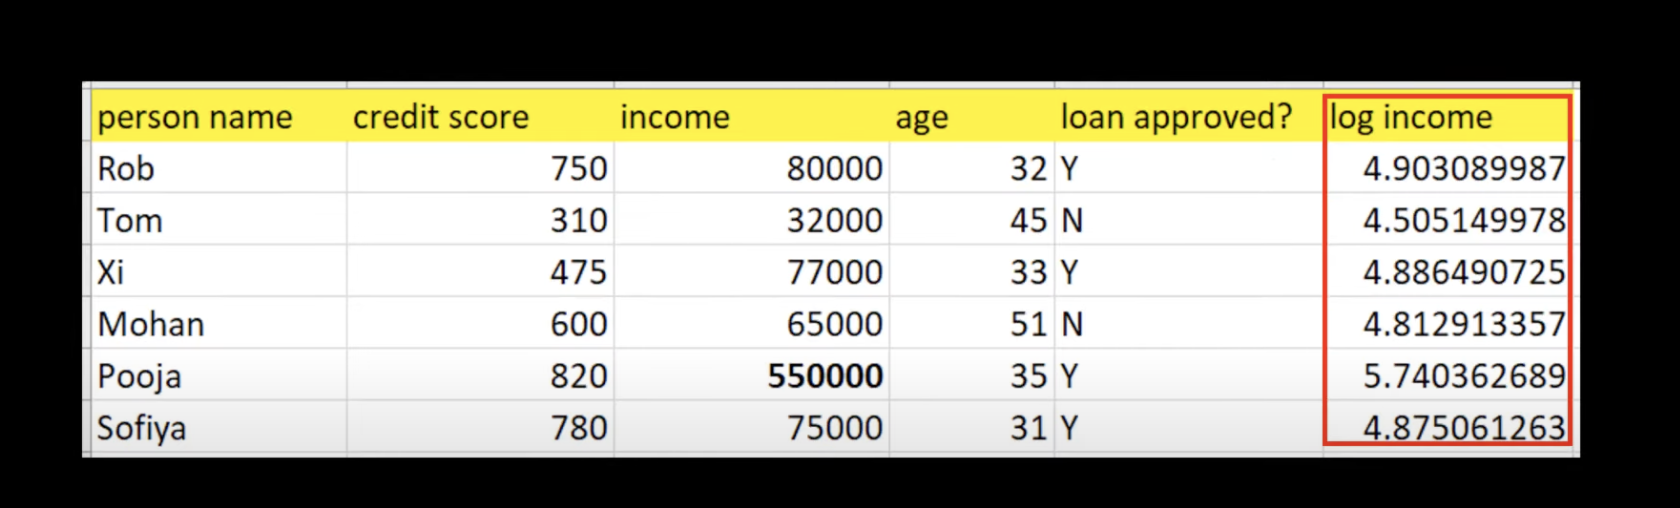

In [23]:
# in here we can see pooja has unusual amount so basically ml model will baise to those values
# what we can do is we can use log to pass the amounts as them so ml model will not be baise on those values

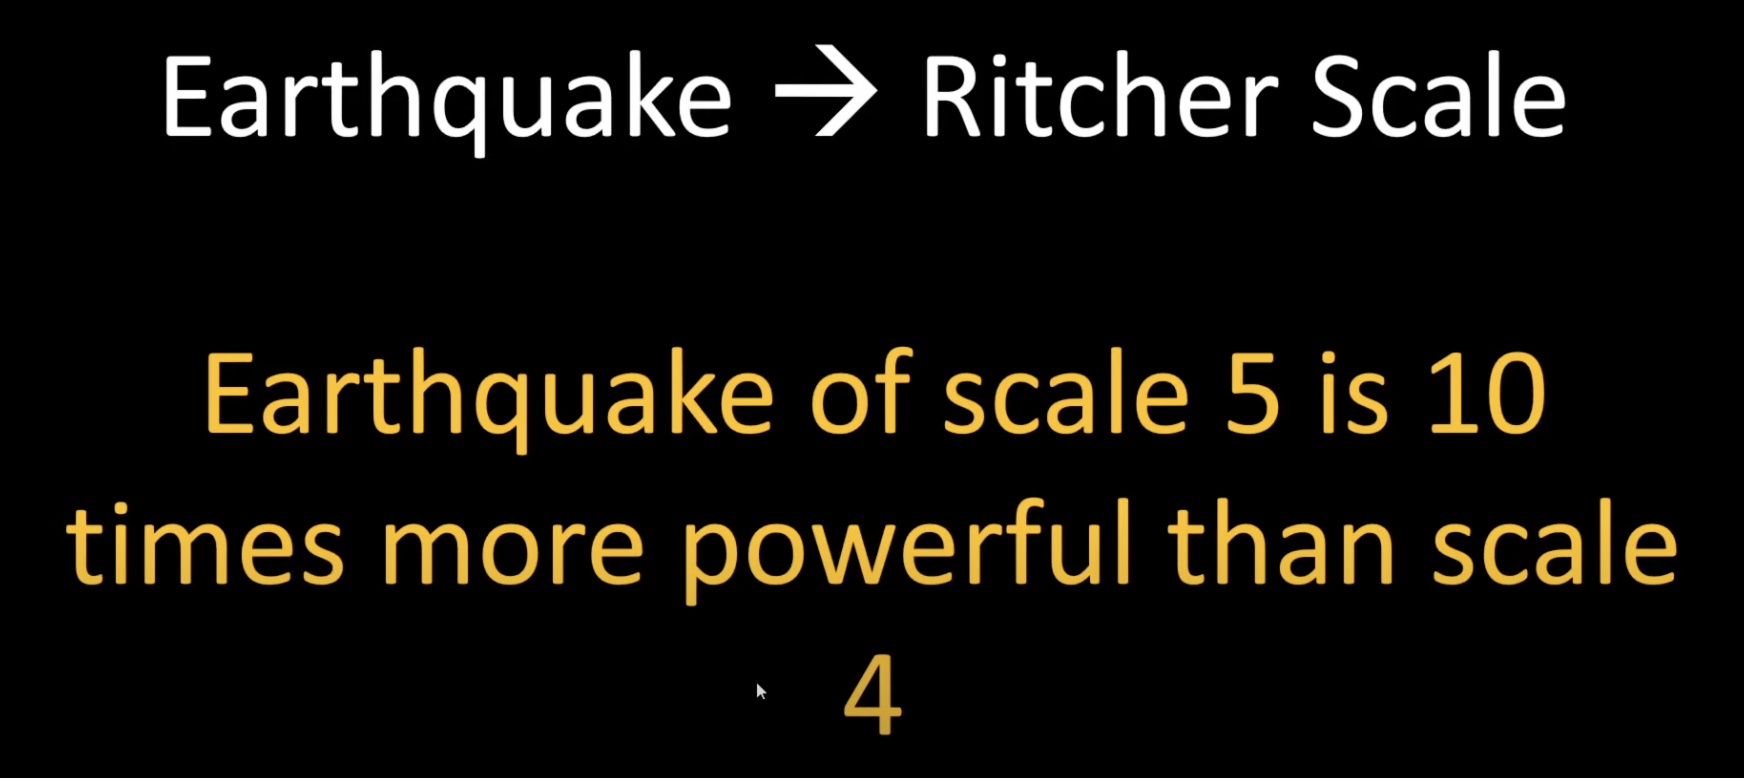

In [25]:
# in here we need to improve the scale we need to tell ml model this difference is larger scale

In [35]:
df = pd.read_csv(
    "data/income 2.csv", 
    index_col=None, 
    names=["income","count"], 
    skiprows=1
)
df.head()

income  count
0    5000   4371
1   10000   3295
2   15000   5825
3   20000   6047
4   25000   6097

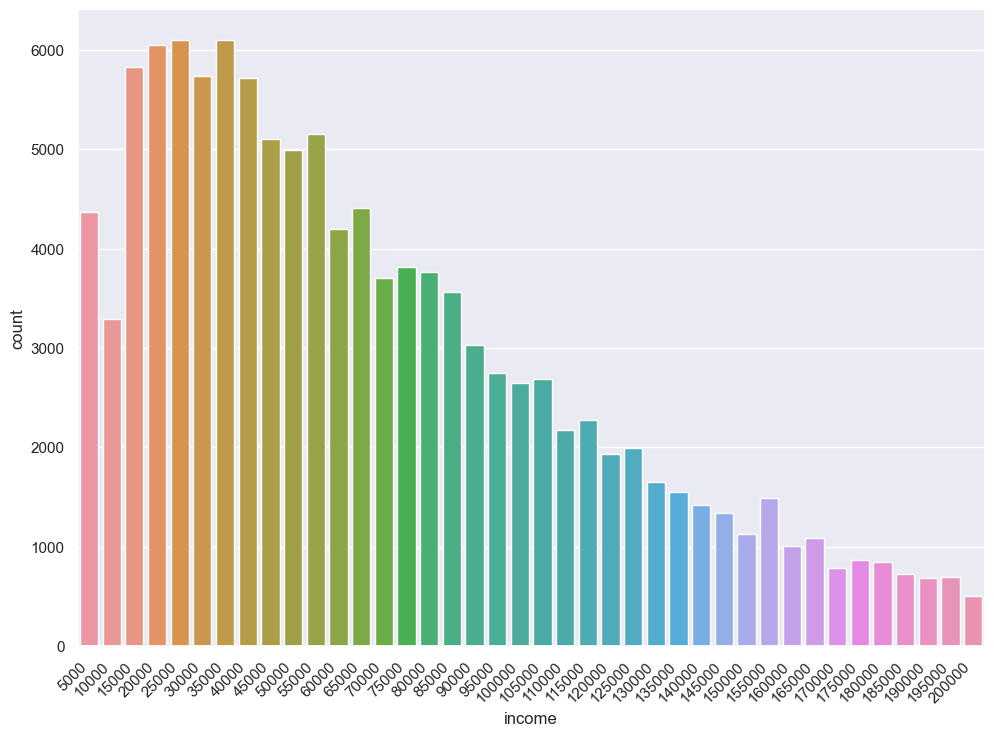

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='income',y='count',data=df)
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right');

#### Sin, Cos, Tan

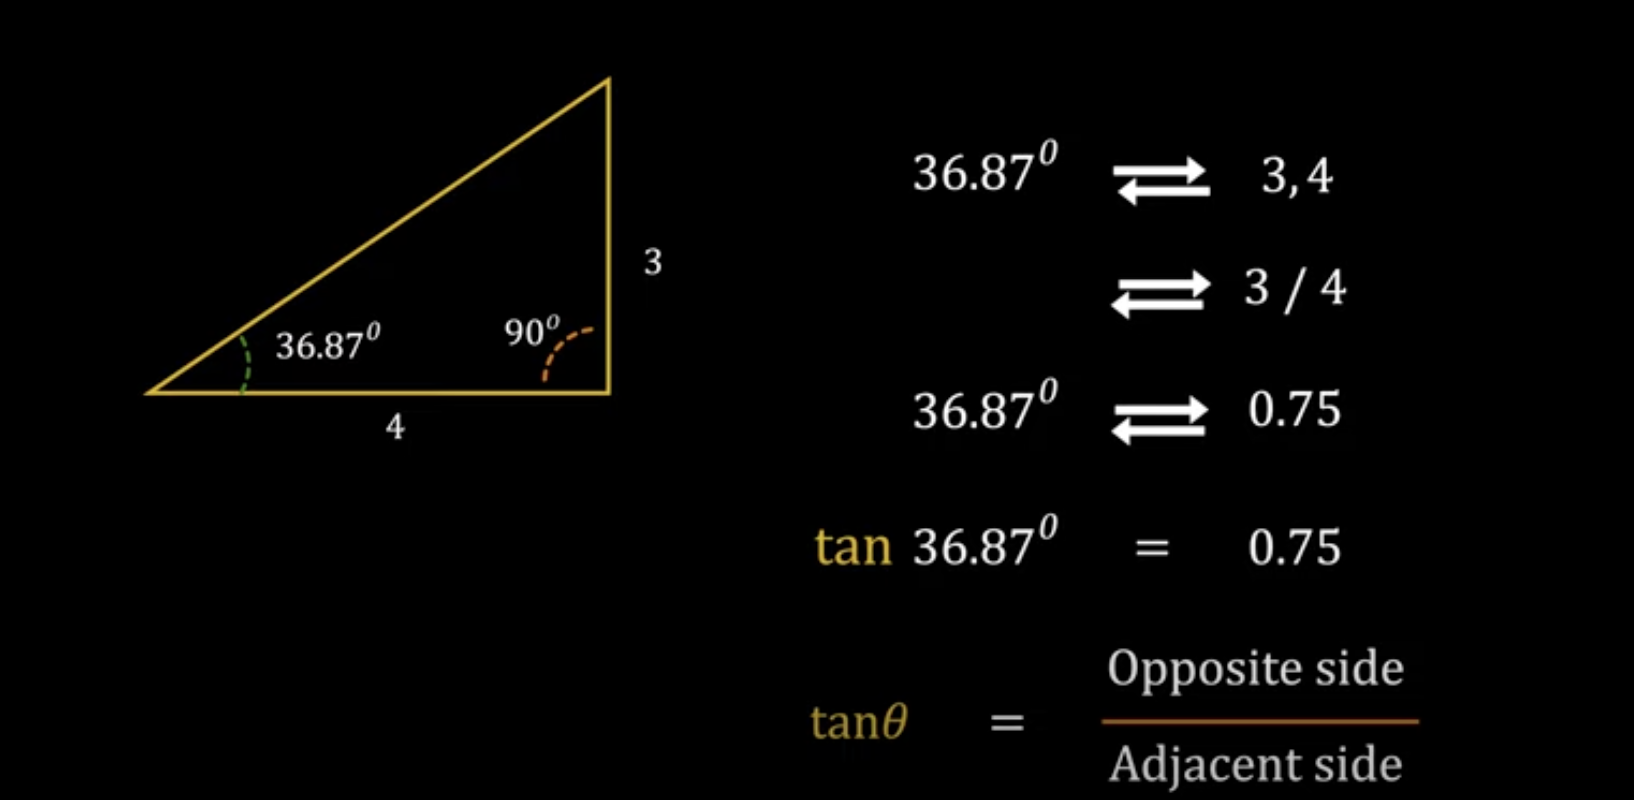

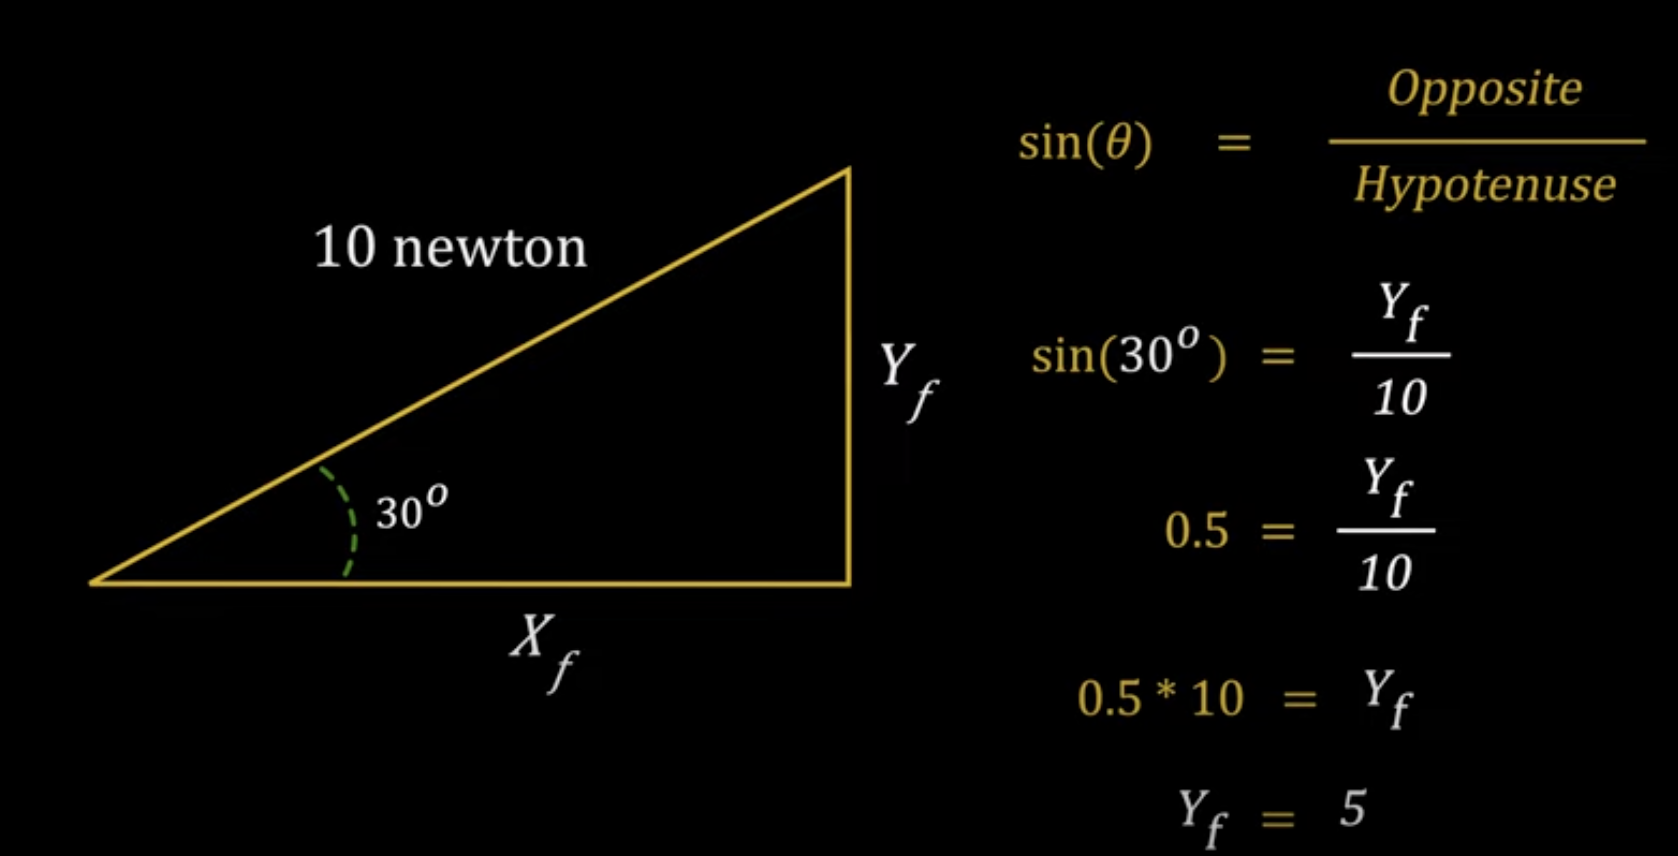

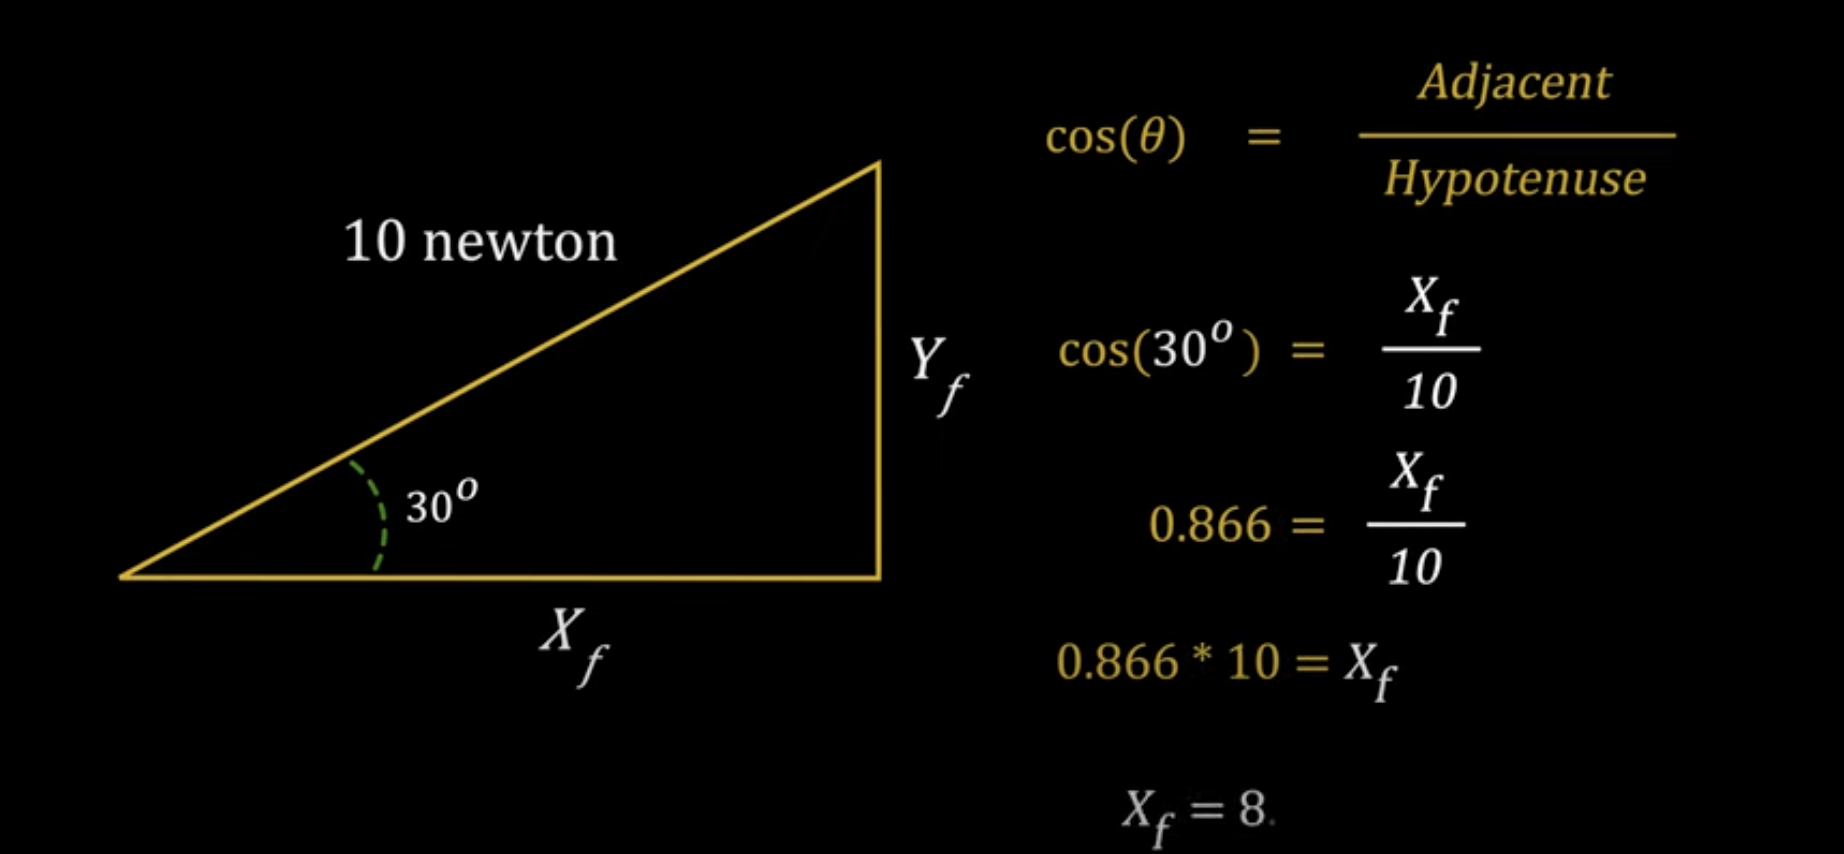

### Use cases on finding the documents

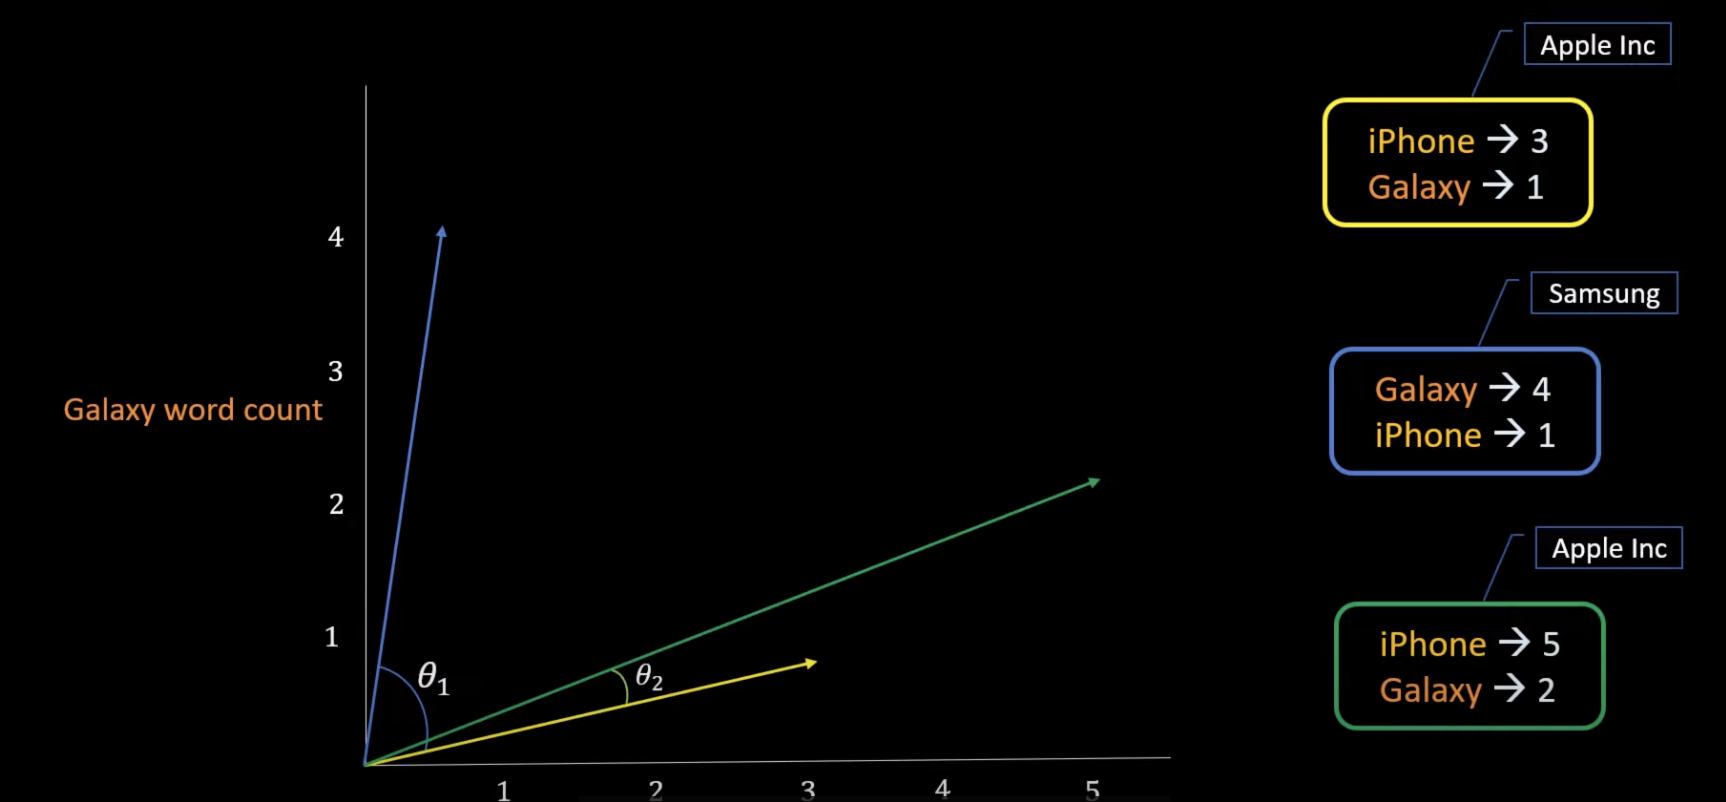

#### In here we are differentiating the documents is it apple doc or Samsung Galaxy doc

1. By comparing the angels we can say which company document belongs to

In [37]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances


In [40]:
cosine_similarity([[3,1]],[[6,2]])  # in here it expects 2d array thats why [[3,1]]

array([[1.]])

In [41]:
cosine_distances([[3,1]],[[6,2]])

array([[1.11022302e-16]])

doc1 = """
iphone sales contributed to 70% of revenue. iphone demand is increasing by 20% yoy. 
the main competitor phone galaxy recorded 5% less growth compared to iphone"
"""

doc2 = """
The upside pressure on volumes for the iPhone 12 series, historical outperformance 
in the July-September time period heading into launch event, and further catalysts in relation
to outperformance for iPhone 13 volumes relative to lowered investor expectations implies a 
very attractive set up for the shares.
"""

doc3 = """
samsung's flagship product galaxy is able to penetrate more into asian markets compared to
iphone. galaxy is redesigned with new look that appeals young demographics. 60% of samsung revenues
are coming from galaxy phone sales
"""

doc4 = """
Samsung Electronics unveils its Galaxy S21 flagship, with modest spec improvements 
and a significantly lower price point. Galaxy S21 price is lower by ~20% (much like the iPhone 12A), 
which highlights Samsung's focus on boosting shipments and regaining market share.
"""

In [42]:
import pandas as pd

df = pd.DataFrame([
        {'iPhone': 3,'galaxy': 1},
        {'iPhone': 2,'galaxy': 0},
        {'iPhone': 1,'galaxy': 3},
        {'iPhone': 1,'galaxy': 2},
    ],
    index=[
        "doc1",
        "doc2",
        "doc3",
        "doc4"
    ])

df

iPhone  galaxy
doc1       3       1
doc2       2       0
doc3       1       3
doc4       1       2

In [43]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc['doc2':'doc2'])

array([[0.9486833]])

In [44]:
cosine_similarity(df.loc["doc1":"doc1"],df.loc['doc3':'doc3'])

array([[0.6]])

In [45]:
cosine_similarity(df.loc["doc3":"doc3"],df.loc['doc4':'doc4'])

array([[0.98994949]])

### A/B Testing 🤪😇

In [46]:
# This is used when we create new models and want to test how it works 
# for example new layouts changes to current version

#### Modified Z-Score

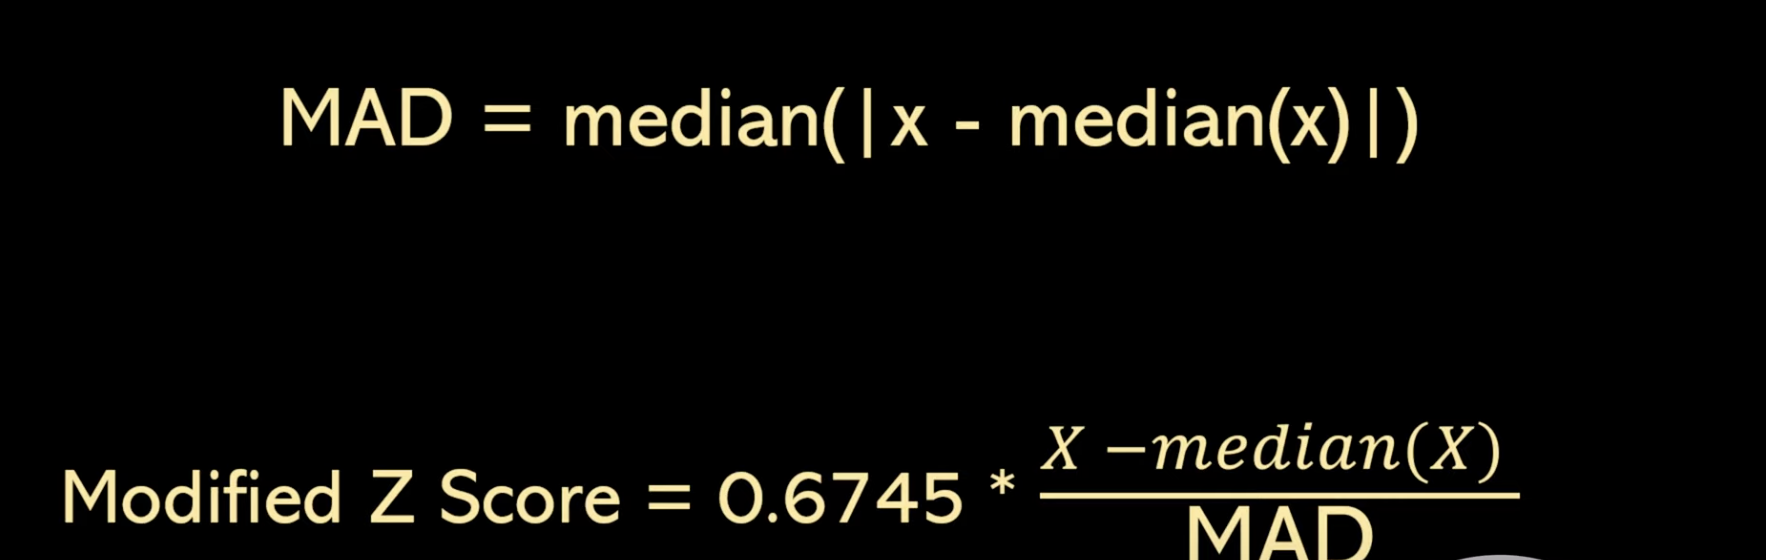

In [47]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('data/movie_revenues.csv')
df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   
3    1000000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
4  100000000  [{"id": 18, "name": "Drama"}, {"id": 878, "nam...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   
3                             NaN  26791   
4                             NaN    644   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   
3                                                 []                en   
4  [{"id": 310, "name": "artificial intelligence"...                en   

                 original_title  \
0                        Avatar   
1            You, Me and Dupree   
2          The Tailor of Panama   
3                  Brigham City   
4  A.I. Artificial Intelligence   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  After standing in as best man for his longtime...   18.600367   
2  A British spy is banished to Panama after havi...    7.047975   
3  Wes Clayton is a lawman and a bishop in a Morm...    0.280083   
4  A robotic boy, the first programmed to love, D...   34.035114   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Universal Pictures", "id": 33}, {"n...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Main Street Movie Company", "id": 6...   
4  [{"name": "DreamWorks SKG", "id": 27}, {"name"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   12/10/2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...    7/14/2006   130431368   
2  [{"iso_3166_1": "IE", "name": "Ireland"}, {"is...    2/11/2001    28008462   
3  [{"iso_3166_1": "US", "name": "United States o...    3/30/2001      852206   
4  [{"iso_3166_1": "US", "name": "United States o...    6/29/2001   235926552   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1      108           [{"iso_639_1": "en", "name": "English"}]  Released   
2      109  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
3      119           [{"iso_639_1": "en", "name": "English"}]  Released   
4      146           [{"iso_639_1": "en", "name": "English"}]  Released   

                                             tagline  \
0                        Enter the World of Pandora.   
1                   Two's company. Dupree's a crowd.   
2  In a place this treacherous, what a good spy n...   
3                                                NaN   
4  David is 11 years old. He weighs 60 pounds. He...   

                          title  vote_average  vote_count  
0                        Avatar           7.2       11800  
1            You, Me and Dupree           5.4         407  
2          The Tailor of Panama           6.2          92  
3                  Brigham City           7.3           4  
4  A.I. Artificial Intelligence           6.8        1974

In [50]:
df.revenue.describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [51]:
df['revenue_mln']=df['revenue'].apply(lambda x:x/1000000)
df.revenue_mln.describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [52]:
df.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   

       original_title                                           overview  \
0              Avatar  In the 22nd century, a paraplegic Marine is di...   
1  You, Me and Dupree  After standing in as best man for his longtime...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   

  release_date     revenue  runtime  \
0   12/10/2009  2787965087      162   
1    7/14/2006   130431368      108   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   

                            tagline               title vote_average  \
0       Enter the World of Pandora.              Avatar          7.2   
1  Two's company. Dupree's a crowd.  You, Me and Dupree          5.4   

   vote_count  revenue_mln  
0       11800  2787.965087  
1         407   130.431368  

[2 rows x 21 columns]

In [58]:
df.revenue_mln.describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [57]:
_, mean, std, *_ = df.revenue_mln.describe()
print(mean)
print(std)

187.92889841304347
455.1144234195408


In [59]:
def get_z_score(value, mean, std):
    return (value-mean)/std

In [60]:
df['Z-Score'] = df.revenue_mln.apply(lambda x: get_z_score(x,mean,std))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   
1   130431368     108           [{"iso_639_1": "en", "name": "English"}]   
2    28008462     109  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                                            tagline  \
0  Released                        Enter the World of Pandora.   
1  Released                   Two's company. Dupree's a crowd.   
2  Released  In a place this treacherous, what a good spy n...   

                  title vote_average vote_count  revenue_mln   Z-Score  
0                Avatar          7.2      11800  2787.965087  5.712929  
1    You, Me and Dupree          5.4        407   130.431368 -0.126336  
2  The Tailor of Panama          6.2         92    28.008462 -0.351385  

[3 rows x 22 columns]

In [64]:
df[['homepage','revenue_mln','Z-Score']].head()

homepage  revenue_mln   Z-Score
0     http://www.avatarmovie.com/  2787.965087  5.712929
1  http://www.youmeanddupree.com/   130.431368 -0.126336
2                             NaN    28.008462 -0.351385
3                             NaN     0.852206 -0.411054
4                             NaN   235.926552  0.105463

In [67]:
df[df['Z-Score']>3]

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  ...  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   

      revenue runtime                                   spoken_languages  \
0  2787965087     162  [{"iso_639_1": "en", "name": "English"}, {"iso...   

     status                      tagline   title vote_average vote_count  \
0  Released  Enter the World of Pandora.  Avatar          7.2      11800   

   revenue_mln   Z-Score  
0  2787.965087  5.712929  

[1 rows x 22 columns]

#### Modified Z-Score

In [72]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [73]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
MAD, median

(56.399542499999995, 83.8171415)

In [74]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [75]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1   54000000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
2   21000000  [{"id": 18, "name": "Drama"}, {"id": 53, "name...   

                         homepage     id  \
0     http://www.avatarmovie.com/  19995   
1  http://www.youmeanddupree.com/   1819   
2                             NaN   2575   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 1253, "name": "roommate"}, {"id": 2038...                en   
2  [{"id": 246, "name": "dancing"}, {"id": 470, "...                en   

         original_title                                           overview  \
0                Avatar  In the 22nd century, a paraplegic Marine is di...   
1    You, Me and Dupree  After standing in as best man for his longtime...   
2  The Tailor of Panama  A British spy is banished to Panama after havi...   

   popularity                               production_companies  ... runtime  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...     162   
1   18.600367  [{"name": "Universal Pictures", "id": 33}, {"n...  ...     108   
2    7.047975  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...     109   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                                             tagline                 title  \
0                        Enter the World of Pandora.                Avatar   
1                   Two's company. Dupree's a crowd.    You, Me and Dupree   
2  In a place this treacherous, what a good spy n...  The Tailor of Panama   

  vote_average vote_count  revenue_mln   Z-Score  mod_z_score  
0          7.2      11800  2787.965087  5.712929    32.339762  
1          5.4        407   130.431368 -0.126336     0.557474  
2          6.2         92    28.008462 -0.351385    -0.667434  

[3 rows x 23 columns]

In [76]:
df[df.mod_z_score > 3.5]

budget                                             genres  \
0   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
7   150000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
12   25000000  [{"id": 53, "name": "Thriller"}, {"id": 28, "n...   

                         homepage      id  \
0     http://www.avatarmovie.com/   19995   
7   http://www.jurassicworld.com/  135397   
12                            NaN     619   

                                             keywords original_language  \
0   [{"id": 1463, "name": "culture clash"}, {"id":...                en   
7   [{"id": 1299, "name": "monster"}, {"id": 1718,...                en   
12  [{"id": 1156, "name": "sister sister relations...                en   

    original_title                                           overview  \
0           Avatar  In the 22nd century, a paraplegic Marine is di...   
7   Jurassic World  Twenty-two years after the events of Jurassic ...   
12   The Bodyguard  A former Secret Service agent grudgingly takes...   

    popularity                               production_companies  ...  \
0   150.437577  [{"name": "Ingenious Film Partners", "id": 289...  ...   
7   418.708552  [{"name": "Universal Studios", "id": 13}, {"na...  ...   
12   26.576385  [{"name": "Tig Productions", "id": 335}, {"nam...  ...   

   runtime                                   spoken_languages    status  \
0      162  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
7      124           [{"iso_639_1": "en", "name": "English"}]  Released   
12     129           [{"iso_639_1": "en", "name": "English"}]  Released   

                                              tagline           title  \
0                         Enter the World of Pandora.          Avatar   
7                                   The park is open.  Jurassic World   
12  Never let her out of your sight. Never let you...   The Bodyguard   

   vote_average vote_count  revenue_mln   Z-Score  mod_z_score  
0           7.2      11800  2787.965087  5.712929    32.339762  
7           6.5       8662  1513.528810  2.912674    17.098375  
12          6.1        661   411.006740  0.490158     3.912964  

[3 rows x 23 columns]